### Select the Right Threshold values using ROC Curve

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# roc curve and auc score
from sklearn.datasets import make_classification




In [2]:
from sklearn.model_selection import train_test_split
X, y = make_classification(n_samples=2000, n_classes=2, weights=[1,1], random_state=1)

#n_samples= total no of rows
#n_features= no of columns, default is 20
#n_classes = says it as binary classification 
#weights = tells the distribution of 2 classes


In [3]:
X.shape

(2000, 20)

In [4]:
y

array([0, 0, 0, ..., 1, 1, 0])

In [5]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [6]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

#### Random Forests

In [7]:
## Apply RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
ytrain_pred = rf_model.predict_proba(X_train) #taking the predicted probablity value of X_train
print('RF train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1]))) 

#Calculating the prob predicted value for X_train and X_test
ytest_pred = rf_model.predict_proba(X_test)
print('RF test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

RF train roc-auc: 1.0
RF test roc-auc: 0.9840777777777777


In [8]:
ytrain_pred

array([[0.99, 0.01],
       [1.  , 0.  ],
       [0.03, 0.97],
       ...,
       [0.99, 0.01],
       [0.98, 0.02],
       [0.39, 0.61]])

#### Logistic Regression

In [9]:
from sklearn.linear_model import LogisticRegression
log_classifier=LogisticRegression()
log_classifier.fit(X_train, y_train)
ytrain_pred = log_classifier.predict_proba(X_train)
print('Logistic train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = log_classifier.predict_proba(X_test)
print('Logistic test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Logistic train roc-auc: 0.9863568922694498
Logistic test roc-auc: 0.9885777777777777


#### Adaboost Classifier

In [10]:
from sklearn.ensemble import AdaBoostClassifier
ada_classifier=AdaBoostClassifier()
ada_classifier.fit(X_train, y_train)
ytrain_pred = ada_classifier.predict_proba(X_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = ada_classifier.predict_proba(X_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Adaboost train roc-auc: 0.9975081174960356
Adaboost test roc-auc: 0.9826111111111111


#### KNNClassifier

In [11]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier=KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
ytrain_pred = knn_classifier.predict_proba(X_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = knn_classifier.predict_proba(X_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Adaboost train roc-auc: 0.981670071491109
Adaboost test roc-auc: 0.9426111111111111


#### No we will focus on selecting the best threshold for maximum accuracy

In [12]:
pred=[]
for model in [rf_model,log_classifier,ada_classifier,knn_classifier]:
    pred.append(pd.Series(model.predict_proba(X_test)[:,1]))  #series will have only 1 column

In [13]:
print(pred)

[0      0.94
1      0.01
2      0.96
3      0.96
4      0.66
5      0.26
6      0.90
7      0.97
8      0.97
9      0.73
10     0.85
11     0.83
12     0.05
13     0.89
14     0.92
15     0.11
16     0.00
17     0.00
18     0.01
19     0.03
20     0.95
21     0.51
22     0.82
23     0.94
24     0.01
25     0.98
26     0.05
27     0.93
28     0.77
29     0.21
       ... 
570    0.99
571    0.01
572    0.99
573    0.12
574    0.04
575    0.92
576    0.03
577    0.06
578    0.14
579    0.01
580    0.54
581    0.02
582    0.04
583    0.03
584    0.37
585    0.93
586    0.03
587    1.00
588    0.01
589    0.16
590    0.64
591    0.05
592    0.01
593    0.01
594    0.04
595    0.00
596    0.02
597    1.00
598    0.01
599    0.99
Length: 600, dtype: float64, 0      0.991861
1      0.000008
2      0.966929
3      0.761539
4      0.779443
5      0.544222
6      0.977857
7      0.960771
8      0.993640
9      0.505748
10     0.863536
11     0.819844
12     0.081238
13     0.902638
14     0.92963

In [16]:
pd.concat(pred,axis=1)

,0,1,2,3
0,0.94,0.991861,0.559186,1.0
1,0.01,0.000008,0.463282,0.0
2,0.96,0.966929,0.538202,0.8
3,0.96,0.761539,0.509875,0.8
4,0.66,0.779443,0.490344,0.4
5,0.26,0.544222,0.492548,0.6
6,0.90,0.977857,0.537171,1.0
7,0.97,0.960771,0.552570,0.8
8,0.97,0.993640,0.537610,1.0
9,0.73,0.505748,0.510507,0.6


In [17]:
final_prediction=pd.concat(pred,axis=1).mean(axis=1)
final_prediction.head()

0    0.872762
1    0.118323
2    0.816283
3    0.757853
4    0.582447
dtype: float64

In [18]:
print('Ensemble test roc-auc: {}'.format(roc_auc_score(y_test,final_prediction)))

Ensemble test roc-auc: 0.9851111111111112


In [19]:
#### Calculate the ROc Curve


fpr, tpr, thresholds = roc_curve(y_test, final_prediction)
thresholds

array([1.91188114, 0.91188114, 0.90478779, 0.90327475, 0.81446108,
       0.81412833, 0.80134271, 0.8005558 , 0.78202438, 0.78071156,
       0.7608411 , 0.76037124, 0.72907482, 0.72887362, 0.70721721,
       0.70643711, 0.65787883, 0.65493537, 0.6015152 , 0.59925354,
       0.59396627, 0.59364346, 0.58656376, 0.58300386, 0.58244674,
       0.58236186, 0.55838469, 0.55719563, 0.54792732, 0.54639283,
       0.54115858, 0.52877948, 0.47419266, 0.47366892, 0.4396034 ,
       0.40014281, 0.39379719, 0.34518074, 0.34336612, 0.24151541,
       0.23890421, 0.2219954 , 0.22146893, 0.20352808, 0.20348417,
       0.12307604, 0.1228351 , 0.10625332])

In [20]:
from sklearn.metrics import accuracy_score
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(final_prediction>thres,1,0)
    accuracy_ls.append(accuracy_score(y_test, y_pred, normalize=True))  #normalize=true will give the relative frequency of the unique value
    
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head()

,thresholds,accuracy
34,0.439603,0.961667
33,0.473669,0.960000
31,0.528779,0.960000
29,0.546393,0.960000
27,0.557196,0.960000


In [21]:
accuracy_ls

,thresholds,accuracy
34,0.439603,0.961667
33,0.473669,0.960000
31,0.528779,0.960000
29,0.546393,0.960000
27,0.557196,0.960000
32,0.474193,0.958333
30,0.541159,0.958333
28,0.547927,0.958333
26,0.558385,0.958333
25,0.582362,0.951667


In [22]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

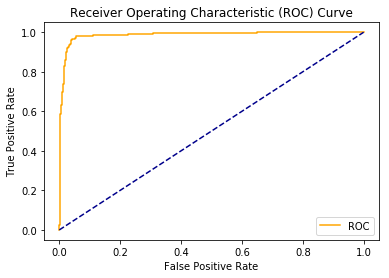

In [23]:
plot_roc_curve(fpr,tpr)